Importing Libraries

In [4]:
import cv2
import numpy as np
from sklearn.datasets import fetch_openml

Loading the MNIST Dataset

In [5]:
mnist_digits = fetch_openml('mnist_784', version=1)
mnist_digits.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
x = mnist_digits["data"]
y = mnist_digits["target"]

In [10]:
x.shape

(70000, 784)

In [16]:
x_train = x.to_numpy().reshape(-1,28,28)
y_train = y.to_numpy().reshape(-1,1)

x_train.shape, y_train.shape

((70000, 28, 28), (70000, 1))

In [20]:
# Convert data to 3 channels

x_train_rgb = np.stack((x_train,)*3,axis=-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(50, 50, 3)


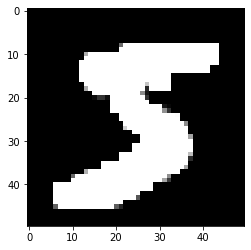

In [41]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(x_train_rgb[0])
x_mod = cv2.resize(x_train_rgb[0],(50,50))
print((x_mod.shape))
plt.imshow(cv2.resize(x_train_rgb[0],(50,50)))

In [43]:
x_train_rgb.shape

(70000, 28, 28, 3)

In [44]:
x_train_rgb[0].shape

(28, 28, 3)

In [61]:
IMG_SIZE = 50
x_train_rgb_size = []
no_of_images = 1
for index, image in enumerate(x_train_rgb):
    # x_train_rgb[index] = cv2.resize(image,(IMG_SIZE, IMG_SIZE))
    # print(cv2.resize(image,(IMG_SIZE,IMG_SIZE)).shape)
    resized_image = cv2.resize(image,(IMG_SIZE,IMG_SIZE))
    x_train_rgb_size.append(resized_image)
    if no_of_images == 500:
        break
    no_of_images = no_of_images+1
    
x_train_rgb_size = np.array(x_train_rgb_size)
x_train_rgb_size.shape

(500, 50, 50, 3)

In [62]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(VGG16(include_top=False, pooling='avg', weights='imagenet', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.layers[0].trainable = False
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [64]:
feature_extraction = model.predict(x_train_rgb_size)

16/16 [==============================] - 14s 910ms/step


In [110]:
feature_extraction.shape

(500, 512)

In [119]:
def dist(A,B):
    return np.sqrt( len(A)* (np.mean(np.square(np.subtract(A,B)))) ) # Euclidean Distance(L2 Norm)

x = [1,2,4,4,6]
y = [1,1,4,4,6]
print(dist(x,y))

1.0


In [82]:
def max_distance(feature_points):
    maxDist = 0
    for i in range(0,len(feature_points)):
        for j in range(0,len(feature_points)):
            if dist(feature_points[i], feature_points[j]) > maxDist:
                maxDist = dist(feature_points[i], feature_points[j])
    return maxDist

In [84]:
def min_distance(feature_points):
    minDist = 100000
    for i in range(0,len(feature_points)):
        for j in range(0,len(feature_points)):
            if dist(feature_points[i], feature_points[j]) < minDist:
                minDist = dist(feature_points[i], feature_points[j])
    return minDist

In [85]:
max_distance(feature_extraction), min_distance(feature_extraction)

(295.118170187808, 0.0)

In [86]:
def no_of_points(datapoint, feature_points, epsilon):
    val = 0
    for i in range(0, len(feature_points)):
        if dist(datapoint,feature_points[i]) < epsilon:
            val +=1
    return val -1 # as datapoint is a member of feature_points set

In [123]:
Total_points = 0
for i in range(len(feature_extraction)):
    Total_points += no_of_points(feature_extraction[i],feature_extraction,epsilon=80)
print(Total_points)

8068


In [126]:
x=0
for i in range(len(feature_extraction)):
    x += no_of_points(feature_extraction[i],feature_extraction,80)/Total_points
print(x)

0.9999999999999992


c:\Users\2137621\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\2137621\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 38.689573
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.355583
[t-SNE] KL divergence after 1000 iterations: 0.708756


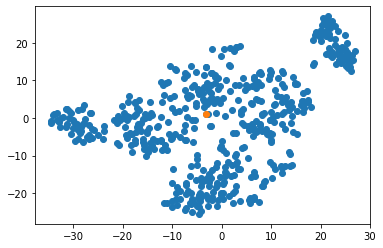

In [116]:
# Visualizing the Feature points dataset
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123)

z = tsne.fit_transform(feature_extraction)

import matplotlib.pyplot as plt

sample_no = 16
plt.scatter(x=z[:,0],y=z[:,1])
plt.scatter(x=z[sample_no,0],y=z[sample_no,1])

In [1]:
# # Set up the blob detector
# detectorobj = cv2.SimpleBlobDetector_create()

# # Detect blobs
# keypoint_info = detectorobj.detect(sample_1)

# # Highlight detected blobs
# sample_1_processed = np.zeros((1,1))
# blobs = cv2.drawKeypoints(sample_1,keypoint_info,np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# # Display blobs in the image
# cv2.imshow("Displaying Blobs", blobs)
# cv2.waitKey(0)

In [125]:
Lambda = 0
epsilon = 80
for i in range(len(feature_extraction)):
    x = no_of_points(feature_extraction[i],feature_extraction,epsilon=epsilon)/Total_points
    if x > Lambda:
        Lambda = x
print(Lambda)

0.00805651958353991


In [127]:
# Formation of QUBO Matrix

cardinality = len(feature_extraction)

Q = np.zeros((cardinality,cardinality), dtype=float)
epsilon = 80

for i in range(cardinality):
    for j in range(cardinality):
        if i>j:
            Q[i][j] = 0
        elif(i == j):
            Q[i][j] = no_of_points(datapoint=feature_extraction[i],feature_points=feature_extraction,epsilon=epsilon)/Total_points
        else:
            if(dist(feature_extraction[i],feature_extraction[j]) < epsilon):
                Q[i][j] = 0
            else:
                Q[i][j] = Lambda

print(Q)


[[0.00024789 0.00805652 0.00805652 ... 0.00805652 0.00805652 0.00805652]
 [0.         0.00173525 0.00805652 ... 0.00805652 0.00805652 0.00805652]
 [0.         0.         0.         ... 0.00805652 0.00805652 0.00805652]
 ...
 [0.         0.         0.         ... 0.         0.00805652 0.00805652]
 [0.         0.         0.         ... 0.         0.00210709 0.00805652]
 [0.         0.         0.         ... 0.         0.         0.00297471]]
